In [56]:
import os
import glob

import pandas as pd
import numpy as np

%matplotlib inline

In [57]:
from helpers import *

# Data prep

In [58]:
concept = 'cumulative_immigration_surplus_min_3_years_of_higher_education_aged_25_64'

In [59]:
df = pd.read_csv('../indata/supermappen/Tabell11B_Nettoflytt_L├еng_utbBas.csv', encoding='latin1' , sep=';', decimal=',')

In [60]:
df = df.rename(columns={
    'Statistikår': 'year',
    'Basområde': 'BASKOD2010',
    'Nettoflytt': 'value'
})

In [61]:
df = baskod2010tobasomrade(df).drop(columns=['BASKOD2010', 'BASKOD2000'])

# Kumulativ summa

Kombinera nya data med gamla för att kunna räkna från senaste årets summa

In [62]:
df = appendNewDatapoints(concept, df, write=False)

Använd bara sista året i gamla tidsserien

In [63]:
df = df[df['year'] >= 2014]

Räkna kumulativ summa

In [64]:
df = df.groupby(['basomrade','year']).sum().groupby(level=[0]).cumsum().reset_index()

Endast data från nya tidsserien

In [65]:
df = df[df['year'] >= 2015]

# Export

In [11]:
combined = appendNewDatapoints(concept, df)

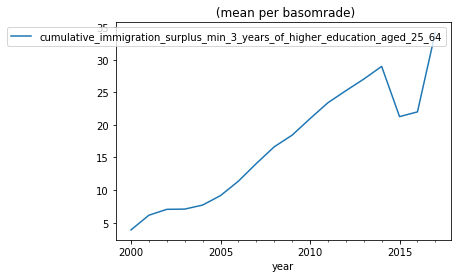

In [12]:
plotcombined(combined, 'cumulative_immigration_surplus_min_3_years_of_higher_education_aged_25_64')